In [1]:
#Libraries

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# preparing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score

# modeling and evaluating
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.linear_model import TweedieRegressor
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans

# Exploring
import scipy.stats as stats
import math

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

%matplotlib inline

# Add more libraries below this line as needed.

In [2]:
import os
import env
import acquire
import wrangle
import explore

credentials loaded successfully
End of file.
Loaded zillow wrangle functions successfully.
Imported prepare.py successfully


# Acquire

In [3]:
df = wrangle.get_zillow_data()
df.shape

(77381, 70)

In [4]:
df.head()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,logerror,pid,tdate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,...,0.025595,14297519,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,...,0.055619,17052889,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,...,0.005383,14186244,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2288172,NaN,...,-0.103410,12177905,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,10887214,NaN,NaN,266.0,2.0,NaN,NaN,1.0,1970746,NaN,...,0.006940,10887214,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77381 entries, 0 to 77380
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77381 non-null  int64  
 1   typeconstructiontypeid        222 non-null    float64
 2   storytypeid                   50 non-null     float64
 3   propertylandusetypeid         77381 non-null  float64
 4   heatingorsystemtypeid         49440 non-null  float64
 5   buildingclasstypeid           15 non-null     float64
 6   architecturalstyletypeid      206 non-null    float64
 7   airconditioningtypeid         24953 non-null  float64
 8   id                            77381 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77381 non-null  float64
 11  bedroomcnt                    77381 non-null  float64
 12  buildingqualitytypeid         49672 non-null  float64
 13  c

In [6]:
df.describe()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,id.1,logerror,pid
count,7.738100e+04,222.000000,50.0,77381.000000,49440.000000,15.000000,206.000000,24953.000000,7.738100e+04,50.000000,...,7.726900e+04,7.738000e+04,77381.0,7.737900e+04,77376.000000,2886.000000,7.713700e+04,77381.000000,77381.000000,7.738100e+04
mean,1.300715e+07,6.040541,7.0,261.826340,3.920510,3.933333,7.388350,1.813289,1.495139e+06,679.720000,...,1.893145e+05,4.901345e+05,2016.0,3.010954e+05,5995.532346,14.087318,6.049673e+13,38848.692754,0.016625,1.300715e+07
std,3.481346e+06,0.557285,0.0,5.141199,3.592779,0.258199,2.734542,2.967894,8.609071e+05,689.703546,...,2.300874e+05,6.534440e+05,0.0,4.925960e+05,7622.844153,2.185663,1.535242e+12,22402.429065,0.170191,3.481346e+06
min,1.071186e+07,4.000000,7.0,31.000000,1.000000,3.000000,2.000000,1.000000,3.490000e+02,38.000000,...,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,0.000000,-4.655420,1.071186e+07
25%,1.153830e+07,6.000000,7.0,261.000000,2.000000,4.000000,7.000000,1.000000,7.520700e+05,273.000000,...,8.426500e+04,2.070000e+05,2016.0,8.550400e+04,2715.632500,14.000000,6.037311e+13,19461.000000,-0.024377,1.153830e+07
50%,1.253157e+07,6.000000,7.0,261.000000,2.000000,4.000000,7.000000,1.000000,1.497932e+06,515.000000,...,1.364990e+05,3.589755e+05,2016.0,2.033720e+05,4450.695000,15.000000,6.037603e+13,38870.000000,0.006627,1.253157e+07
75%,1.421183e+07,6.000000,7.0,266.000000,7.000000,4.000000,7.000000,1.000000,2.240535e+06,796.500000,...,2.187870e+05,5.690015e+05,2016.0,3.667965e+05,6927.790000,15.000000,6.059042e+13,58253.000000,0.039203,1.421183e+07
max,1.676893e+08,13.000000,7.0,275.000000,24.000000,4.000000,21.000000,13.000000,2.982274e+06,3560.000000,...,1.142179e+07,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,77613.000000,5.262999,1.676893e+08


# Prep

### First step, remove columns that I know I won't be needing

A lot of missing values, however I will remove the columns I don't think I'll be needing first, then address missing rows.

In [7]:
# Dropping columns I don't think I'll need. If I do end up needing them, come back to this point after the MVP is done.

df = wrangle.drop_cols(df)
df.shape

(77381, 50)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77381 entries, 0 to 77380
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        222 non-null    float64
 1   storytypeid                   50 non-null     float64
 2   propertylandusetypeid         77381 non-null  float64
 3   buildingclasstypeid           15 non-null     float64
 4   architecturalstyletypeid      206 non-null    float64
 5   airconditioningtypeid         24953 non-null  float64
 6   basementsqft                  50 non-null     float64
 7   bathroomcnt                   77381 non-null  float64
 8   bedroomcnt                    77381 non-null  float64
 9   decktypeid                    614 non-null    float64
 10  finishedfloor1squarefeet      6023 non-null   float64
 11  calculatedfinishedsquarefeet  77185 non-null  float64
 12  finishedsquarefeet13          41 non-null     float64
 13  f

In [9]:
# I need to isolate down to only single unit properties, which equate to this list:

id_list = [261.0, 260.0, 262.0, 263.0, 264.0]

In [10]:
# Now I have 20k less rows, so good for the most part. Now need to cut down the columns:

df = wrangle.prep_data(df, id_list)
df.shape

(52244, 50)

In [11]:
df = wrangle.handle_missing_values(df, col_limit = .6, row_limit = .6)
df.shape

(52244, 16)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52244 entries, 0 to 77380
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         52244 non-null  float64
 1   bathroomcnt                   52244 non-null  float64
 2   bedroomcnt                    52244 non-null  float64
 3   calculatedfinishedsquarefeet  52236 non-null  float64
 4   fips                          52244 non-null  float64
 5   latitude                      52244 non-null  float64
 6   longitude                     52244 non-null  float64
 7   lotsizesquarefeet             51883 non-null  float64
 8   regionidcity                  51216 non-null  float64
 9   roomcnt                       52244 non-null  float64
 10  yearbuilt                     52204 non-null  float64
 11  structuretaxvaluedollarcnt    52172 non-null  float64
 12  taxvaluedollarcnt             52243 non-null  float64
 13  l

In [13]:
# I don't need this column any more.
df.drop(columns = ['propertylandusetypeid'], inplace = True)


In [14]:
df.isna().sum().sort_values(ascending = False)

regionidcity                    1028
lotsizesquarefeet                361
structuretaxvaluedollarcnt        72
yearbuilt                         40
calculatedfinishedsquarefeet       8
taxamount                          4
landtaxvaluedollarcnt              1
taxvaluedollarcnt                  1
logerror                           0
roomcnt                            0
longitude                          0
latitude                           0
fips                               0
bedroomcnt                         0
bathroomcnt                        0
dtype: int64

## Things on my mind:

- Will clustering be beneficial to my understanding of the data and relationships
- Are there new features I can create from my current feature list that will do a better job of predicting `logerror`?

In [15]:
pd.set_option('display.max_columns', 40)

# Adding new dummy columns:

county_df = pd.get_dummies(df.fips)
county_df.head(1)

county_df.columns = ["LA", "Orange", "Ventura"]
# df_dummies = pd.concat([df, county_df], axis = 1)
df = pd.concat([df, county_df], axis = 1)
print(df.shape)
df.head(1)

(52244, 18)


,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,LA,Orange,Ventura
0,3.5,4.0,3100.0,6059.0,33.634931,-117.869207,4506.0,53571.0,0.0,1998.0,485713.0,1023282.0,537569.0,11013.72,0.025595,0,1,0


In [16]:
# adding features:

def create_features(df):
    df['age'] = 2017 - df.yearbuilt

    # create taxrate variable
    df['taxrate'] = df.taxamount/df.taxvaluedollarcnt
    
    # create acres variable
    df['acres'] = df.lotsizesquarefeet/43560
    
    # dollar per square foot-structure
    df['structure_dollar_per_sqft'] = df.structuretaxvaluedollarcnt/df.calculatedfinishedsquarefeet

    # dollar per square foot-land
    df['land_dollar_per_sqft'] = df.landtaxvaluedollarcnt/df.lotsizesquarefeet
    
    # ratio of beds to baths
    df['bed_bath_ratio'] = df.bedroomcnt/df.bathroomcnt
    
    
    
    return df

In [17]:
df = create_features(df)

<AxesSubplot:xlabel='structure_dollar_per_sqft', ylabel='fips'>

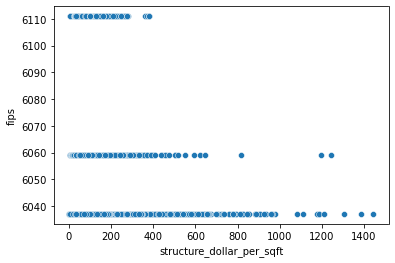

In [18]:
sns.scatterplot(x = 'structure_dollar_per_sqft', y = 'fips', data = df)

# Note there are only about 8 outliers that are making the 4th quartile to the max value extremely large compared to the rest of the quartiles.
# These kind of outliers will greatly affect the clustering models. Need to remove them.

In [19]:
# Need to remove outliers because outliers have a very large negative impact on clustering.

def remove_outliers():
    '''
    remove outliers in in structure dollars and land dollars.
    '''

    return df[((df.bathroomcnt <= 7) & (df.bedroomcnt <= 7) &  
               (df.bathroomcnt > 0) & 
               (df.bedroomcnt > 0) & 
               (df.acres < 10) &
               (df.calculatedfinishedsquarefeet < 7000) & 
               (df.taxrate < .05) &
               (df.structure_dollar_per_sqft < 1001) &
               (df.land_dollar_per_sqft < 1501)
              )]

<AxesSubplot:xlabel='structure_dollar_per_sqft', ylabel='fips'>

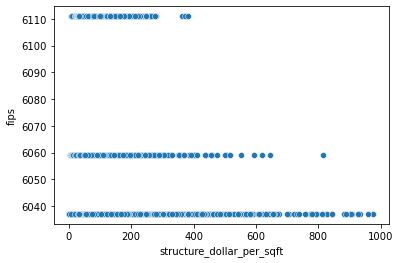

In [20]:
df = remove_outliers()
sns.scatterplot(x = 'structure_dollar_per_sqft', y = 'fips', data = df)

<AxesSubplot:xlabel='land_dollar_per_sqft', ylabel='structure_dollar_per_sqft'>

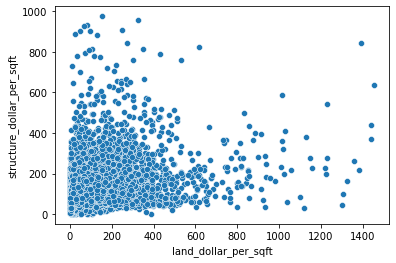

In [21]:
sns.scatterplot(x = 'land_dollar_per_sqft', y = 'structure_dollar_per_sqft', data = df)

In [22]:
df.isnull().sum().sort_values(ascending = False)

regionidcity                    970
age                              32
yearbuilt                        32
bed_bath_ratio                    0
structuretaxvaluedollarcnt        0
bedroomcnt                        0
calculatedfinishedsquarefeet      0
fips                              0
latitude                          0
longitude                         0
lotsizesquarefeet                 0
roomcnt                           0
taxvaluedollarcnt                 0
land_dollar_per_sqft              0
landtaxvaluedollarcnt             0
taxamount                         0
logerror                          0
LA                                0
Orange                            0
Ventura                           0
taxrate                           0
acres                             0
structure_dollar_per_sqft         0
bathroomcnt                       0
dtype: int64

In [23]:
df = df.dropna()

In [24]:
df.shape

(50441, 24)

In [ ]:
df[df.fips == 6037].logerror.mean(), df[df.fips == 6059].logerror.mean(), df[df.fips == 6111].logerror.mean()

In [ ]:
df_la = df[df.LA == 1].drop(columns = ['Orange', 'Ventura'])
df_la.shape

In [ ]:
df_o = df[df.Orange == 1].drop(columns = ['LA', 'Ventura'])
df_v = df[df.Ventura == 1].drop(columns = ['Orange', 'LA'])
df_o.shape, df_v.shape

In [ ]:
df_la.head(1)

In [ ]:
# Checking to see the count of fips in each new county df. Making sure there wasn't any leakage between them.

df_la.fips.value_counts(), df_o.fips.value_counts(), df_v.fips.value_counts(),

At this point, I'd want to do everything in triplets, but I think that'll take too long so I'm going to continue using the main dataframe and just add a county column so that I can still divide things by county.

I'll end up with 3 dataframes per county df, which means a total of 9 dataframes... That seems like a bit much, at least for an MVP.

In [ ]:
# I no longer need this column:

# df = df.drop(columns = "propertylandusetypeid")
# df.drop(columns = ['regionidcity', 'regionidcounty', 'unitcnt'], inplace = True)
df.info()

In [ ]:
df.head()

## Splitting Data

In [ ]:
train, validate, test = wrangle.split_zillow_data(df)

In [ ]:
# Impute missing values
train.isna().sum().sort_values(ascending = False)

In [ ]:
# No need to run this since there are no missing values...

train, validate, test = wrangle.impute_missing_values_all(train, validate, test)
train.head()

# Don't forget to .cut() in this area
# bin by age of house, county, tax bracket, and sq footage for starters

In [25]:
X_train, X_validate, X_test, X_train_explore, X_train_explore_scaled, y_train, y_validate, y_test, X_train_scaled, X_validate_scaled, X_test_scaled = explore.split_scale(df)

In [26]:
X_train.shape, X_train_scaled.shape, X_train_explore.shape

((28246, 23), (28246, 23), (28246, 24))

## End of prep:

- All missing values accounted for
- All columns still in dataframe are ones I need for analysis
- Data not yet scaled, need to accomplish this before moving on with rest of Explore stage

## *Outliers still need to be dealt with after the MVP is complete*

# Explore Stage

- Based on Faith's advice for the MVP, I will be exploring based upon unscaled train, validate, and test data.
- However, when it comes time to model, I'll need to scale the data. I would prefer to have that step completed at end of prep, so will add scaling section here
### y_train ==  `logerror`

In [27]:
X_train_explore.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio
15372,2.0,3.0,1256.0,6037.0,34.131750,-117.837678,8492.0,11626.0,0.0,1961.0,80137.0,111961.0,31824.0,1603.28,0.040576,1,0,0,56.0,0.014320,0.194949,63.803344,3.747527,1.500000
25551,1.0,2.0,1212.0,6037.0,33.896194,-118.296552,8551.0,45398.0,0.0,1924.0,74000.0,370000.0,296000.0,4657.83,-0.220377,1,0,0,93.0,0.012589,0.196304,61.056106,34.615834,2.000000
35475,2.0,3.0,1194.0,6037.0,34.188469,-118.605795,6899.0,12447.0,0.0,1954.0,95269.0,476345.0,381076.0,5879.69,-0.017587,1,0,0,63.0,0.012343,0.158379,79.789782,55.236411,1.500000
33783,2.5,4.0,2475.0,6059.0,33.807010,-117.836975,6515.0,33252.0,8.0,1964.0,164614.0,623172.0,458558.0,6786.14,-0.015516,0,1,0,53.0,0.010890,0.149564,66.510707,70.384958,1.600000
5437,3.0,5.0,2603.0,6037.0,34.293665,-118.500322,12342.0,12447.0,0.0,1966.0,92139.0,135604.0,43465.0,1894.99,-0.006203,1,0,0,51.0,0.013974,0.283333,35.397234,3.521714,1.666667


### Adding 1st Cluster

In [212]:

value_vars = ['calculatedfinishedsquarefeet', 'taxrate', 'structure_dollar_per_sqft']

def elbow_plot(cluster_vars):
    # elbow method to identify good k for us
    ks = range(2,20)
    
    # empty list to hold inertia (sum of squares)
    sse = []

    # loop through each k, fit kmeans, get inertia
    for k in ks:
        kmeans = KMeans(n_clusters=k, random_state = 123)
        kmeans.fit(X_train_scaled[cluster_vars])
        # inertia
        sse.append(kmeans.inertia_)

    print(pd.DataFrame(dict(k=ks, sse=sse)))

    # plot k with inertia
    plt.plot(ks, sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('Elbow method to find optimal k')
    plt.show()

     k         sse
0    2  365.243030
1    3  276.436324
2    4  220.705182
3    5  186.842757
4    6  167.825953
5    7  150.283895
6    8  135.712206
7    9  124.213787
8   10  115.040852
9   11  107.480873
10  12  101.521425
11  13   95.848665
12  14   91.098010
13  15   86.169469
14  16   82.499391
15  17   78.929171
16  18   75.344083
17  19   72.272414


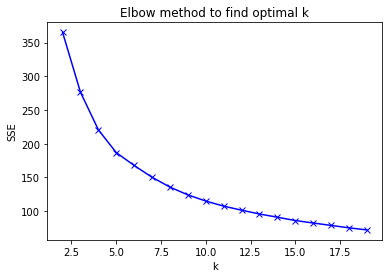

In [213]:
elbow_plot(cluster_vars = value_vars)

In [30]:
k = 6

def run_kmeans(k, cluster_vars, cluster_col_name):
    # create kmeans object
    kmeans = KMeans(n_clusters = k, random_state = 13)
    kmeans.fit(X_train_scaled[cluster_vars])
    # predict and create a dataframe with cluster per observation
    train_clusters = \
        pd.DataFrame(kmeans.predict(X_train_scaled[cluster_vars]),
                              columns=[cluster_col_name],
                              index=X_train.index)
    
    return train_clusters, kmeans

In [31]:
train_clusters, kmeans = run_kmeans(k=5, cluster_vars = ['calculatedfinishedsquarefeet', 'taxrate', 'structure_dollar_per_sqft'], cluster_col_name = 'value_cluster')

In [33]:
def get_centroids(cluster_vars, cluster_col_name):
    centroid_col_names = ['centroid_' + i for i in cluster_vars]

    centroids = pd.DataFrame(kmeans.cluster_centers_, 
             columns=centroid_col_names).reset_index().rename(columns={'index': cluster_col_name})
    
    return centroids

In [35]:
centroids = get_centroids(cluster_vars = value_vars, cluster_col_name='value_cluster')

In [36]:
centroids

,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft
0,0,0.160203,0.251401,0.084494
1,1,0.664695,0.235669,0.173596
2,2,0.176756,0.402766,0.049257
3,3,0.419138,0.244813,0.121419
4,4,0.272617,0.247363,0.094382


In [37]:
centroids.shape, X_train_explore.shape, X_train_explore_scaled.shape, X_train_scaled.shape, X_train.shape

((5, 4), (28246, 24), (28246, 24), (28246, 23), (28246, 23))

In [46]:
X_train, X_train_scaled = explore.add_clusters(train_clusters, centroids, X_train, X_train_scaled, cluster_col_name = 'value_cluster')

In [48]:
X_train_explore, X_train_explore_scaled = explore.add_clusters(train_clusters, centroids, X_train_explore, X_train_explore_scaled, cluster_col_name = 'value_cluster')

In [49]:
# Adding clusters to validate and test df's:

validate_clusters = explore.kmeans_transform(X_validate_scaled, kmeans, value_vars, cluster_col_name = 'value_cluster')
test_clusters = explore.kmeans_transform(X_test_scaled, kmeans, value_vars, cluster_col_name = 'value_cluster')

In [50]:
train_clusters.shape, validate_clusters.shape, test_clusters.shape

((28246, 1), (12106, 1), (10089, 1))

In [51]:
train_clusters.value_cluster.value_counts()

0    11711
4     8521
3     4143
2     2755
1     1116
Name: value_cluster, dtype: int64

In [52]:
X_validate.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio
52901,4.0,4.0,3180.0,6111.0,34.236437,-118.788191,7397.0,27110.0,10.0,2000.0,284000.0,814000.0,530000.0,9106.20,0,0,1,17.0,0.011187,0.169812,89.308176,71.650669,1.0
26478,2.0,5.0,2030.0,6037.0,34.059603,-118.314499,7233.0,12447.0,0.0,1918.0,163558.0,654240.0,490682.0,8033.24,1,0,0,99.0,0.012279,0.166047,80.570443,67.839347,2.5
36966,2.0,3.0,1568.0,6059.0,33.730264,-117.630641,24002.0,16389.0,6.0,1984.0,59178.0,63304.0,4126.0,600.60,0,1,0,33.0,0.009488,0.551010,37.741071,0.171902,1.5
74471,2.5,3.0,2320.0,6059.0,33.724160,-118.055665,1830.0,25218.0,8.0,1972.0,164255.0,800524.0,636269.0,8952.06,0,1,0,45.0,0.011183,0.042011,70.799569,347.687978,1.2
64375,4.0,4.0,3037.0,6037.0,34.205742,-118.632234,5048.0,12447.0,0.0,1989.0,231751.0,470122.0,238371.0,5786.01,1,0,0,28.0,0.012307,0.115886,76.309187,47.220880,1.0


In [53]:
# Adding clusters and centroids to validate and test dfs.

X_validate, X_validate_scaled = explore.add_clusters(validate_clusters, centroids, X_validate, X_validate_scaled, cluster_col_name = 'value_cluster')
X_test, X_test_scaled = explore.add_clusters(test_clusters, centroids, X_test, X_test_scaled, cluster_col_name = 'value_cluster')
X_validate.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft
52901,4.0,4.0,3180.0,6111.0,34.236437,-118.788191,7397.0,27110.0,10.0,2000.0,284000.0,814000.0,530000.0,9106.20,0,0,1,17.0,0.011187,0.169812,89.308176,71.650669,1.0,3,0.419138,0.244813,0.121419
26478,2.0,5.0,2030.0,6037.0,34.059603,-118.314499,7233.0,12447.0,0.0,1918.0,163558.0,654240.0,490682.0,8033.24,1,0,0,99.0,0.012279,0.166047,80.570443,67.839347,2.5,4,0.272617,0.247363,0.094382
36966,2.0,3.0,1568.0,6059.0,33.730264,-117.630641,24002.0,16389.0,6.0,1984.0,59178.0,63304.0,4126.0,600.60,0,1,0,33.0,0.009488,0.551010,37.741071,0.171902,1.5,0,0.160203,0.251401,0.084494
74471,2.5,3.0,2320.0,6059.0,33.724160,-118.055665,1830.0,25218.0,8.0,1972.0,164255.0,800524.0,636269.0,8952.06,0,1,0,45.0,0.011183,0.042011,70.799569,347.687978,1.2,4,0.272617,0.247363,0.094382
64375,4.0,4.0,3037.0,6037.0,34.205742,-118.632234,5048.0,12447.0,0.0,1989.0,231751.0,470122.0,238371.0,5786.01,1,0,0,28.0,0.012307,0.115886,76.309187,47.220880,1.0,3,0.419138,0.244813,0.121419


In [54]:


X_test.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft
28646,1.0,2.0,675.0,6037.0,33.914055,-118.090480,3180.0,53636.0,0.0,1930.0,65699.0,328511.0,262812.0,4204.69,1,0,0,87.0,0.012799,0.073003,97.331852,82.645283,2.000000,0,0.160203,0.251401,0.084494
13779,2.0,3.0,1309.0,6059.0,33.719700,-118.013737,6267.0,25218.0,6.0,1963.0,67019.0,619302.0,552283.0,7003.76,0,1,0,54.0,0.011309,0.143871,51.198625,88.125578,1.500000,0,0.160203,0.251401,0.084494
7124,1.0,2.0,1080.0,6037.0,33.819336,-118.210794,7925.0,46298.0,0.0,1941.0,61491.0,194664.0,133173.0,2513.32,1,0,0,76.0,0.012911,0.181933,56.936111,16.804164,2.000000,0,0.160203,0.251401,0.084494
8860,3.0,2.0,2732.0,6037.0,33.778203,-118.127286,5010.0,46298.0,0.0,1972.0,212700.0,910000.0,697300.0,10843.11,1,0,0,45.0,0.011916,0.115014,77.855051,139.181637,0.666667,3,0.419138,0.244813,0.121419
17294,2.0,4.0,2476.0,6037.0,34.113002,-118.318171,3956.0,12447.0,0.0,1925.0,232994.0,1164975.0,931981.0,14115.18,1,0,0,92.0,0.012116,0.090817,94.100969,235.586704,2.000000,4,0.272617,0.247363,0.094382


### Adding 2nd Cluster

     k         sse
0    2  340.837499
1    3  187.833240
2    4  133.052606
3    5  109.235708
4    6   88.874319
5    7   76.142145
6    8   66.245285
7    9   58.378113
8   10   52.316428
9   11   47.561473
10  12   43.799843
11  13   40.160531
12  14   37.676573
13  15   35.365622
14  16   33.305650
15  17   31.370948
16  18   29.309853
17  19   27.792794


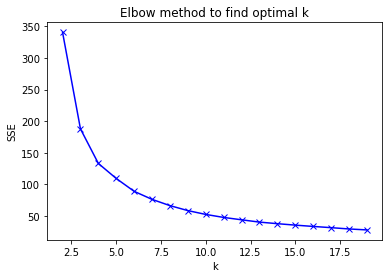

In [64]:
# Adding the second cluster:

cluster_vars = ['land_dollar_per_sqft', 'age']
elbow_plot(cluster_vars)

In [65]:
# Right at 5 centroids again. So we'll set our kmeans k = 5:

train_clusters2, kmeans2 = run_kmeans(k=5, cluster_vars = cluster_vars, cluster_col_name = 'land_cluster')

In [66]:
train_clusters2.land_cluster.value_counts()

1    9604
2    7228
4    4877
0    3408
3    3129
Name: land_cluster, dtype: int64

In [73]:
X_train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft
15372,0.166667,0.333333,0.161333,0.000000,0.537461,0.860562,0.018427,0.020696,0.000000,0.595588,0.022352,0.003953,0.001324,0.005387,1.0,0.0,0.0,0.404412,0.286140,0.018427,0.066195,0.002551,0.250000,0,0.160203,0.251401,0.084494
25551,0.000000,0.166667,0.154903,0.000000,0.377387,0.619421,0.018563,0.106616,0.000000,0.323529,0.020621,0.014124,0.013153,0.015976,1.0,0.0,0.0,0.676471,0.251318,0.018563,0.063330,0.023771,0.357143,0,0.160203,0.251401,0.084494
35475,0.166667,0.333333,0.152272,0.000000,0.576005,0.456912,0.014764,0.022785,0.000000,0.544118,0.026621,0.018316,0.016962,0.020211,1.0,0.0,0.0,0.455882,0.246383,0.014764,0.082868,0.037946,0.250000,0,0.160203,0.251401,0.084494
33783,0.250000,0.500000,0.339471,0.297297,0.316782,0.860932,0.013880,0.075715,0.571429,0.617647,0.046182,0.024103,0.020432,0.023354,0.0,1.0,0.0,0.382353,0.217144,0.013880,0.069019,0.048360,0.271429,4,0.272617,0.247363,0.094382
5437,0.333333,0.666667,0.358176,0.000000,0.647492,0.512339,0.027282,0.022785,0.000000,0.632353,0.025738,0.004885,0.001845,0.006399,1.0,0.0,0.0,0.367647,0.279190,0.027282,0.036570,0.002396,0.285714,4,0.272617,0.247363,0.094382


In [75]:
def get_centroids(kmeans, cluster_vars, cluster_col_name):
    centroid_col_names = ['centroid_' + i for i in cluster_vars]

    centroids = pd.DataFrame(kmeans.cluster_centers_, 
             columns=centroid_col_names).reset_index().rename(columns={'index': cluster_col_name})
    
    return centroids

In [76]:
cluster_vars

['land_dollar_per_sqft', 'age']

In [77]:
centroids_2 = get_centroids(kmeans2, cluster_vars, cluster_col_name='land_cluster')

In [ ]:
X_train, X_train_scaled = explore.add_clusters(train_clusters2, centroids_2, X_train, X_train_scaled, cluster_col_name = 'land_cluster')
X_train_explore, X_train_explore_scaled = explore.add_clusters(train_clusters2, centroids_2, X_train_explore, X_train_explore_scaled, cluster_col_name = 'land_cluster')

In [125]:
# fitting clusters to validate and test df's:

validate_clusters2 = explore.kmeans_transform(X_validate_scaled, kmeans2, cluster_vars, cluster_col_name = 'land_cluster')
test_clusters2 = explore.kmeans_transform(X_test_scaled, kmeans2, cluster_vars, cluster_col_name = 'land_cluster')

In [126]:
X_validate, X_validate_scaled = explore.add_clusters(validate_clusters2, centroids_2, X_validate, X_validate_scaled, cluster_col_name = 'land_cluster')
X_test, X_test_scaled = explore.add_clusters(test_clusters2, centroids_2, X_test, X_test_scaled, cluster_col_name = 'land_cluster')
X_validate.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft,land_cluster,centroid_land_dollar_per_sqft,centroid_age
52901,4.0,4.0,3180.0,6111.0,34.236437,-118.788191,7397.0,27110.0,10.0,2000.0,284000.0,814000.0,530000.0,9106.20,0,0,1,17.0,0.011187,0.169812,89.308176,71.650669,1.0,3,0.419138,0.244813,0.121419,0,0.053814,0.105084
26478,2.0,5.0,2030.0,6037.0,34.059603,-118.314499,7233.0,12447.0,0.0,1918.0,163558.0,654240.0,490682.0,8033.24,1,0,0,99.0,0.012279,0.166047,80.570443,67.839347,2.5,4,0.272617,0.247363,0.094382,3,0.040129,0.682825
36966,2.0,3.0,1568.0,6059.0,33.730264,-117.630641,24002.0,16389.0,6.0,1984.0,59178.0,63304.0,4126.0,600.60,0,1,0,33.0,0.009488,0.551010,37.741071,0.171902,1.5,0,0.160203,0.251401,0.084494,4,0.030599,0.240478
74471,2.5,3.0,2320.0,6059.0,33.724160,-118.055665,1830.0,25218.0,8.0,1972.0,164255.0,800524.0,636269.0,8952.06,0,1,0,45.0,0.011183,0.042011,70.799569,347.687978,1.2,4,0.272617,0.247363,0.094382,2,0.030748,0.375577
64375,4.0,4.0,3037.0,6037.0,34.205742,-118.632234,5048.0,12447.0,0.0,1989.0,231751.0,470122.0,238371.0,5786.01,1,0,0,28.0,0.012307,0.115886,76.309187,47.220880,1.0,3,0.419138,0.244813,0.121419,4,0.030599,0.240478


In [127]:
X_train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft,land_cluster,centroid_land_dollar_per_sqft,centroid_age_x,location_cluster,centroid_latitude,centroid_longitude,centroid_age_y,rooms_cluster,centroid_bedroomcnt,centroid_bathroomcnt
15372,0.166667,0.333333,0.161333,0.000000,0.537461,0.860562,0.018427,0.020696,0.000000,0.595588,0.022352,0.003953,0.001324,0.005387,1.0,0.0,0.0,0.404412,0.286140,0.018427,0.066195,0.002551,0.250000,0,0.160203,0.251401,0.084494,2,0.030748,0.375577,1,0.376944,0.765169,0.421808,2,0.331365,0.168928
25551,0.000000,0.166667,0.154903,0.000000,0.377387,0.619421,0.018563,0.106616,0.000000,0.323529,0.020621,0.014124,0.013153,0.015976,1.0,0.0,0.0,0.676471,0.251318,0.018563,0.063330,0.023771,0.357143,0,0.160203,0.251401,0.084494,3,0.040129,0.682825,2,0.505995,0.605995,0.564721,0,0.155796,0.054997
35475,0.166667,0.333333,0.152272,0.000000,0.576005,0.456912,0.014764,0.022785,0.000000,0.544118,0.026621,0.018316,0.016962,0.020211,1.0,0.0,0.0,0.455882,0.246383,0.014764,0.082868,0.037946,0.250000,0,0.160203,0.251401,0.084494,1,0.026009,0.483308,3,0.611310,0.364449,0.300845,2,0.331365,0.168928
33783,0.250000,0.500000,0.339471,0.297297,0.316782,0.860932,0.013880,0.075715,0.571429,0.617647,0.046182,0.024103,0.020432,0.023354,0.0,1.0,0.0,0.382353,0.217144,0.013880,0.069019,0.048360,0.271429,4,0.272617,0.247363,0.094382,2,0.030748,0.375577,1,0.376944,0.765169,0.421808,1,0.523749,0.259913
5437,0.333333,0.666667,0.358176,0.000000,0.647492,0.512339,0.027282,0.022785,0.000000,0.632353,0.025738,0.004885,0.001845,0.006399,1.0,0.0,0.0,0.367647,0.279190,0.027282,0.036570,0.002396,0.285714,4,0.272617,0.247363,0.094382,2,0.030748,0.375577,3,0.611310,0.364449,0.300845,1,0.523749,0.259913


In [128]:
X_validate_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft,land_cluster,centroid_land_dollar_per_sqft,centroid_age
52901,0.500000,0.500000,0.442496,1.000000,0.608602,0.361062,0.015909,0.060089,0.714286,0.882353,0.079858,0.031625,0.023631,0.031396,0.0,0.0,1.0,0.117647,0.223124,0.015909,0.092795,0.049230,0.142857,3,0.419138,0.244813,0.121419,0,0.053814,0.105084
26478,0.166667,0.666667,0.274441,0.000000,0.488433,0.609990,0.015532,0.022785,0.000000,0.279412,0.045884,0.025328,0.021870,0.027677,1.0,0.0,0.0,0.720588,0.245083,0.015532,0.083682,0.046610,0.464286,4,0.272617,0.247363,0.094382,3,0.040129,0.682825
36966,0.166667,0.333333,0.206927,0.297297,0.264628,0.969361,0.054100,0.032814,0.428571,0.764706,0.016440,0.002035,0.000084,0.001911,0.0,1.0,0.0,0.235294,0.188943,0.054100,0.039014,0.000093,0.250000,0,0.160203,0.251401,0.084494,4,0.030599,0.240478
74471,0.250000,0.333333,0.316820,0.297297,0.260480,0.746009,0.003105,0.055276,0.571429,0.676471,0.046080,0.031094,0.028389,0.030862,0.0,1.0,0.0,0.323529,0.223039,0.003105,0.073492,0.238987,0.185714,4,0.272617,0.247363,0.094382,2,0.030748,0.375577
64375,0.500000,0.500000,0.421599,0.000000,0.587743,0.443018,0.010506,0.022785,0.000000,0.801471,0.065119,0.018070,0.010573,0.019887,1.0,0.0,0.0,0.198529,0.245661,0.010506,0.079238,0.032436,0.142857,3,0.419138,0.244813,0.121419,4,0.030599,0.240478


### Hypothesis Test:

##### Features: `age` and `land_dollar_per_sqft`

$H_0$: The population means for the 5 clusters are all equal (**no** significant difference)

$H_a$: The population means for the 5 clusters are not equal (there **is** a significant difference)

In [83]:
alpha = .05

cluster_one = X_train_explore_scaled[X_train_explore_scaled.land_cluster == 0].logerror
cluster_two = X_train_explore_scaled[X_train_explore_scaled.land_cluster == 1].logerror
cluster_three = X_train_explore_scaled[X_train_explore_scaled.land_cluster == 2].logerror
cluster_four = X_train_explore_scaled[X_train_explore_scaled.land_cluster == 3].logerror
cluster_five = X_train_explore_scaled[X_train_explore_scaled.land_cluster == 4].logerror

In [84]:
cluster_one

23906    0.606150
15704    0.592538
66569    0.561903
24840    0.592408
25408    0.594845
           ...   
7799     0.593852
72695    0.596917
53446    0.620486
6374     0.592030
52444    0.618836
Name: logerror, Length: 3408, dtype: float64

In [85]:
import scipy.stats as stats

f, p = stats.f_oneway(cluster_one, cluster_two, cluster_three, cluster_four, cluster_five)
f, p

(5.421549146773912, 0.00023220389388420675)

In [86]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject null hypothesis")

We reject the null hypothesis


#### Do a t-test on each individual subgroup.
If I'm able to find one or two subgroups that are significantly different than the population mean, (Use an independent t-test) then I can do a linear regression or polynomial regression.

In [87]:
X_train_explore_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28246 entries, 15372 to 52444
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   bathroomcnt                            28246 non-null  float64
 1   bedroomcnt                             28246 non-null  float64
 2   calculatedfinishedsquarefeet           28246 non-null  float64
 3   fips                                   28246 non-null  float64
 4   latitude                               28246 non-null  float64
 5   longitude                              28246 non-null  float64
 6   lotsizesquarefeet                      28246 non-null  float64
 7   regionidcity                           28246 non-null  float64
 8   roomcnt                                28246 non-null  float64
 9   yearbuilt                              28246 non-null  float64
 10  structuretaxvaluedollarcnt             28246 non-null  float64
 11

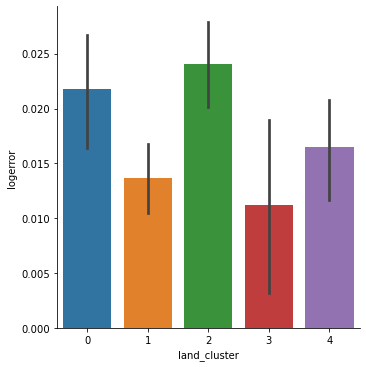

In [90]:
sns.catplot(x="land_cluster", y="logerror", kind="bar", data=X_train_explore)

Clusters 1 and 3 appear to have a lower average log error than the other clusters, so I'm going to take those into modeling.

### Adding 3rd Cluster

     k          sse
0    2  1702.765597
1    3  1153.792548
2    4   899.843310
3    5   734.447218
4    6   623.396429
5    7   552.829503
6    8   494.590032
7    9   441.232235
8   10   394.854137
9   11   371.634512
10  12   350.635458
11  13   329.569795
12  14   307.679286
13  15   293.267929
14  16   276.542541
15  17   262.862374
16  18   253.892366
17  19   240.553423


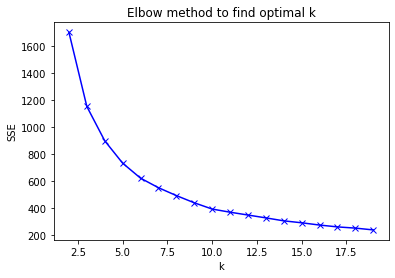

In [94]:
cluster_vars3 = ['latitude', 'longitude', 'age']
elbow_plot(cluster_vars3)

In [95]:
# Not too surprising, optimal k at 5 centroids again. So we'll set our kmeans k = 5:

train_clusters3, kmeans3 = run_kmeans(k=5, cluster_vars = cluster_vars3, cluster_col_name = 'location_cluster')

In [96]:
X_train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft,land_cluster,centroid_land_dollar_per_sqft,centroid_age
15372,0.166667,0.333333,0.161333,0.000000,0.537461,0.860562,0.018427,0.020696,0.000000,0.595588,0.022352,0.003953,0.001324,0.005387,1.0,0.0,0.0,0.404412,0.286140,0.018427,0.066195,0.002551,0.250000,0,0.160203,0.251401,0.084494,2,0.030748,0.375577
25551,0.000000,0.166667,0.154903,0.000000,0.377387,0.619421,0.018563,0.106616,0.000000,0.323529,0.020621,0.014124,0.013153,0.015976,1.0,0.0,0.0,0.676471,0.251318,0.018563,0.063330,0.023771,0.357143,0,0.160203,0.251401,0.084494,3,0.040129,0.682825
35475,0.166667,0.333333,0.152272,0.000000,0.576005,0.456912,0.014764,0.022785,0.000000,0.544118,0.026621,0.018316,0.016962,0.020211,1.0,0.0,0.0,0.455882,0.246383,0.014764,0.082868,0.037946,0.250000,0,0.160203,0.251401,0.084494,1,0.026009,0.483308
33783,0.250000,0.500000,0.339471,0.297297,0.316782,0.860932,0.013880,0.075715,0.571429,0.617647,0.046182,0.024103,0.020432,0.023354,0.0,1.0,0.0,0.382353,0.217144,0.013880,0.069019,0.048360,0.271429,4,0.272617,0.247363,0.094382,2,0.030748,0.375577
5437,0.333333,0.666667,0.358176,0.000000,0.647492,0.512339,0.027282,0.022785,0.000000,0.632353,0.025738,0.004885,0.001845,0.006399,1.0,0.0,0.0,0.367647,0.279190,0.027282,0.036570,0.002396,0.285714,4,0.272617,0.247363,0.094382,2,0.030748,0.375577


In [98]:
centroids3 = get_centroids(kmeans3, cluster_vars3, cluster_col_name='location_cluster')

In [99]:
centroids3

,location_cluster,centroid_latitude,centroid_longitude,centroid_age
0,0,0.842824,0.691400,0.213125
1,1,0.376944,0.765169,0.421808
2,2,0.505995,0.605995,0.564721
3,3,0.611310,0.364449,0.300845
4,4,0.231752,0.891943,0.213275


In [100]:
# concatenate cluster id
X_train = pd.concat([X_train, train_clusters3], axis=1)

# join on clusterid to get centroids
X_train = X_train.merge(centroids3, how='left', on='location_cluster').\
                set_index(X_train.index)

# concatenate cluster id
X_train_scaled = pd.concat([X_train_scaled, train_clusters3], 
                        axis=1)

# join on clusterid to get centroids
X_train_scaled = X_train_scaled.merge(centroids3, how='left', on='location_cluster').\
                set_index(X_train.index)

# concatenate cluster id
X_train_explore = pd.concat([X_train_explore, train_clusters3], 
                        axis=1)

# join on clusterid to get centroids
X_train_explore = X_train_explore.merge(centroids3, how='left', on='location_cluster').\
                set_index(X_train.index)

# concatenate cluster id
X_train_explore_scaled = pd.concat([X_train_explore_scaled, train_clusters3], 
                        axis=1)

# join on clusterid to get centroids
X_train_explore_scaled = X_train_explore_scaled.merge(centroids3, how='left', on='location_cluster').\
                set_index(X_train.index)

#### Adding to validate and test

In [134]:
# fitting clusters to validate and test df's:

validate_clusters3 = explore.kmeans_transform(X_validate_scaled, kmeans3, cluster_vars3, cluster_col_name = 'location_cluster')
test_clusters3 = explore.kmeans_transform(X_test_scaled, kmeans3, cluster_vars3, cluster_col_name = 'location_cluster')

In [135]:
# Adding centroids and clusters to validate and test dataframes.

X_validate, X_validate_scaled = explore.add_clusters(validate_clusters3, centroids3, X_validate, X_validate_scaled, cluster_col_name = 'location_cluster')
X_test, X_test_scaled = explore.add_clusters(test_clusters3, centroids3, X_test, X_test_scaled, cluster_col_name = 'location_cluster')
X_validate.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft,land_cluster,centroid_land_dollar_per_sqft,centroid_age_x,rooms_cluster,centroid_bedroomcnt,centroid_bathroomcnt,location_cluster,centroid_latitude,centroid_longitude,centroid_age_y
52901,4.0,4.0,3180.0,6111.0,34.236437,-118.788191,7397.0,27110.0,10.0,2000.0,284000.0,814000.0,530000.0,9106.20,0,0,1,17.0,0.011187,0.169812,89.308176,71.650669,1.0,3,0.419138,0.244813,0.121419,0,0.053814,0.105084,3,0.587845,0.580627,3,0.611310,0.364449,0.300845
26478,2.0,5.0,2030.0,6037.0,34.059603,-118.314499,7233.0,12447.0,0.0,1918.0,163558.0,654240.0,490682.0,8033.24,1,0,0,99.0,0.012279,0.166047,80.570443,67.839347,2.5,4,0.272617,0.247363,0.094382,3,0.040129,0.682825,1,0.523749,0.259913,2,0.505995,0.605995,0.564721
36966,2.0,3.0,1568.0,6059.0,33.730264,-117.630641,24002.0,16389.0,6.0,1984.0,59178.0,63304.0,4126.0,600.60,0,1,0,33.0,0.009488,0.551010,37.741071,0.171902,1.5,0,0.160203,0.251401,0.084494,4,0.030599,0.240478,2,0.331365,0.168928,4,0.231752,0.891943,0.213275
74471,2.5,3.0,2320.0,6059.0,33.724160,-118.055665,1830.0,25218.0,8.0,1972.0,164255.0,800524.0,636269.0,8952.06,0,1,0,45.0,0.011183,0.042011,70.799569,347.687978,1.2,4,0.272617,0.247363,0.094382,2,0.030748,0.375577,2,0.331365,0.168928,1,0.376944,0.765169,0.421808
64375,4.0,4.0,3037.0,6037.0,34.205742,-118.632234,5048.0,12447.0,0.0,1989.0,231751.0,470122.0,238371.0,5786.01,1,0,0,28.0,0.012307,0.115886,76.309187,47.220880,1.0,3,0.419138,0.244813,0.121419,4,0.030599,0.240478,3,0.587845,0.580627,3,0.611310,0.364449,0.300845


In [101]:
X_train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft,land_cluster,centroid_land_dollar_per_sqft,centroid_age_x,location_cluster,centroid_latitude,centroid_longitude,centroid_age_y
15372,0.166667,0.333333,0.161333,0.000000,0.537461,0.860562,0.018427,0.020696,0.000000,0.595588,0.022352,0.003953,0.001324,0.005387,1.0,0.0,0.0,0.404412,0.286140,0.018427,0.066195,0.002551,0.250000,0,0.160203,0.251401,0.084494,2,0.030748,0.375577,1,0.376944,0.765169,0.421808
25551,0.000000,0.166667,0.154903,0.000000,0.377387,0.619421,0.018563,0.106616,0.000000,0.323529,0.020621,0.014124,0.013153,0.015976,1.0,0.0,0.0,0.676471,0.251318,0.018563,0.063330,0.023771,0.357143,0,0.160203,0.251401,0.084494,3,0.040129,0.682825,2,0.505995,0.605995,0.564721
35475,0.166667,0.333333,0.152272,0.000000,0.576005,0.456912,0.014764,0.022785,0.000000,0.544118,0.026621,0.018316,0.016962,0.020211,1.0,0.0,0.0,0.455882,0.246383,0.014764,0.082868,0.037946,0.250000,0,0.160203,0.251401,0.084494,1,0.026009,0.483308,3,0.611310,0.364449,0.300845
33783,0.250000,0.500000,0.339471,0.297297,0.316782,0.860932,0.013880,0.075715,0.571429,0.617647,0.046182,0.024103,0.020432,0.023354,0.0,1.0,0.0,0.382353,0.217144,0.013880,0.069019,0.048360,0.271429,4,0.272617,0.247363,0.094382,2,0.030748,0.375577,1,0.376944,0.765169,0.421808
5437,0.333333,0.666667,0.358176,0.000000,0.647492,0.512339,0.027282,0.022785,0.000000,0.632353,0.025738,0.004885,0.001845,0.006399,1.0,0.0,0.0,0.367647,0.279190,0.027282,0.036570,0.002396,0.285714,4,0.272617,0.247363,0.094382,2,0.030748,0.375577,3,0.611310,0.364449,0.300845


In [104]:
X_train_scaled.location_cluster.value_counts()

1    9297
2    7632
4    4590
3    4399
0    2328
Name: location_cluster, dtype: int64

### Hypothesis Test:

##### Features: `latitude` and `logitude` and `age`

$H_0$: The population means for the 5 clusters are all equal (**no** significant difference)

$H_a$: The population means for the 5 clusters are not equal (there **is** a significant difference)

In [105]:
alpha = .05

cluster_one = X_train_explore_scaled[X_train_explore_scaled.location_cluster == 0].logerror
cluster_two = X_train_explore_scaled[X_train_explore_scaled.location_cluster == 1].logerror
cluster_three = X_train_explore_scaled[X_train_explore_scaled.location_cluster == 2].logerror
cluster_four = X_train_explore_scaled[X_train_explore_scaled.location_cluster == 3].logerror
cluster_five = X_train_explore_scaled[X_train_explore_scaled.location_cluster == 4].logerror

In [106]:
import scipy.stats as stats

f, p = stats.f_oneway(cluster_one, cluster_two, cluster_three, cluster_four, cluster_five)
f, p

(10.545510387574957, 1.5513753523981837e-08)

In [107]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject null hypothesis")

We reject the null hypothesis


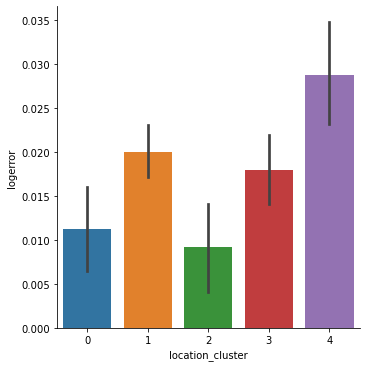

In [108]:
sns.catplot(x="location_cluster", y="logerror", kind="bar", data=X_train_explore)

#### Takeaways:

- It appears that location data combined with age clusters makes for even stronger ANOVA test results.
- If there were more time, I would want to do individual independing t-tests in order to determine which cluster's `logerror` means varys the most from the population mean.

### Adding 4th Cluster

     k         sse
0    2  677.725634
1    3  465.893420
2    4  329.493193
3    5  267.585794
4    6  210.139371
5    7  165.491622
6    8  136.787787
7    9  101.810067
8   10   82.298965
9   11   69.462859
10  12   63.400779
11  13   57.804125
12  14   51.122944
13  15   45.825675
14  16   40.693352
15  17   36.926795
16  18   31.505693
17  19   28.257265


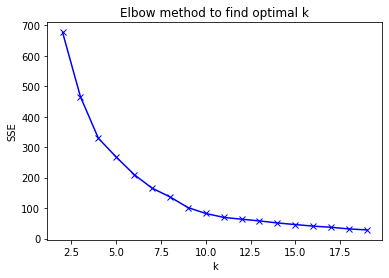

In [110]:
cluster_vars4 = ['bedroomcnt', 'bathroomcnt']
elbow_plot(cluster_vars4)

In [111]:
train_clusters4, kmeans4 = run_kmeans(k=4, cluster_vars = cluster_vars4, cluster_col_name = 'rooms_cluster')

In [114]:
centroids4 = get_centroids(kmeans4, cluster_vars4, cluster_col_name='rooms_cluster')

In [118]:
X_train_scaled.rooms_cluster.value_counts()

2    12789
1     8625
0     4523
3     2309
Name: rooms_cluster, dtype: int64

In [116]:
X_train, X_train_scaled = explore.add_clusters(train_clusters4, centroids4, X_train, X_train_scaled, cluster_col_name = 'rooms_cluster')
X_train_explore, X_train_explore_scaled = explore.add_clusters(train_clusters4, centroids4, X_train_explore, X_train_explore_scaled, cluster_col_name = 'rooms_cluster')

In [129]:
X_train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft,land_cluster,centroid_land_dollar_per_sqft,centroid_age_x,location_cluster,centroid_latitude,centroid_longitude,centroid_age_y,rooms_cluster,centroid_bedroomcnt,centroid_bathroomcnt
15372,0.166667,0.333333,0.161333,0.000000,0.537461,0.860562,0.018427,0.020696,0.000000,0.595588,0.022352,0.003953,0.001324,0.005387,1.0,0.0,0.0,0.404412,0.286140,0.018427,0.066195,0.002551,0.250000,0,0.160203,0.251401,0.084494,2,0.030748,0.375577,1,0.376944,0.765169,0.421808,2,0.331365,0.168928
25551,0.000000,0.166667,0.154903,0.000000,0.377387,0.619421,0.018563,0.106616,0.000000,0.323529,0.020621,0.014124,0.013153,0.015976,1.0,0.0,0.0,0.676471,0.251318,0.018563,0.063330,0.023771,0.357143,0,0.160203,0.251401,0.084494,3,0.040129,0.682825,2,0.505995,0.605995,0.564721,0,0.155796,0.054997
35475,0.166667,0.333333,0.152272,0.000000,0.576005,0.456912,0.014764,0.022785,0.000000,0.544118,0.026621,0.018316,0.016962,0.020211,1.0,0.0,0.0,0.455882,0.246383,0.014764,0.082868,0.037946,0.250000,0,0.160203,0.251401,0.084494,1,0.026009,0.483308,3,0.611310,0.364449,0.300845,2,0.331365,0.168928
33783,0.250000,0.500000,0.339471,0.297297,0.316782,0.860932,0.013880,0.075715,0.571429,0.617647,0.046182,0.024103,0.020432,0.023354,0.0,1.0,0.0,0.382353,0.217144,0.013880,0.069019,0.048360,0.271429,4,0.272617,0.247363,0.094382,2,0.030748,0.375577,1,0.376944,0.765169,0.421808,1,0.523749,0.259913
5437,0.333333,0.666667,0.358176,0.000000,0.647492,0.512339,0.027282,0.022785,0.000000,0.632353,0.025738,0.004885,0.001845,0.006399,1.0,0.0,0.0,0.367647,0.279190,0.027282,0.036570,0.002396,0.285714,4,0.272617,0.247363,0.094382,2,0.030748,0.375577,3,0.611310,0.364449,0.300845,1,0.523749,0.259913


In [130]:
# fitting clusters to validate and test df's:

validate_clusters4 = explore.kmeans_transform(X_validate_scaled, kmeans4, cluster_vars4, cluster_col_name = 'rooms_cluster')
test_clusters4 = explore.kmeans_transform(X_test_scaled, kmeans4, cluster_vars4, cluster_col_name = 'rooms_cluster')

In [131]:
X_validate, X_validate_scaled = explore.add_clusters(validate_clusters4, centroids4, X_validate, X_validate_scaled, cluster_col_name = 'rooms_cluster')
X_test, X_test_scaled = explore.add_clusters(test_clusters4, centroids4, X_test, X_test_scaled, cluster_col_name = 'rooms_cluster')
X_validate.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft,land_cluster,centroid_land_dollar_per_sqft,centroid_age,rooms_cluster,centroid_bedroomcnt,centroid_bathroomcnt
52901,4.0,4.0,3180.0,6111.0,34.236437,-118.788191,7397.0,27110.0,10.0,2000.0,284000.0,814000.0,530000.0,9106.20,0,0,1,17.0,0.011187,0.169812,89.308176,71.650669,1.0,3,0.419138,0.244813,0.121419,0,0.053814,0.105084,3,0.587845,0.580627
26478,2.0,5.0,2030.0,6037.0,34.059603,-118.314499,7233.0,12447.0,0.0,1918.0,163558.0,654240.0,490682.0,8033.24,1,0,0,99.0,0.012279,0.166047,80.570443,67.839347,2.5,4,0.272617,0.247363,0.094382,3,0.040129,0.682825,1,0.523749,0.259913
36966,2.0,3.0,1568.0,6059.0,33.730264,-117.630641,24002.0,16389.0,6.0,1984.0,59178.0,63304.0,4126.0,600.60,0,1,0,33.0,0.009488,0.551010,37.741071,0.171902,1.5,0,0.160203,0.251401,0.084494,4,0.030599,0.240478,2,0.331365,0.168928
74471,2.5,3.0,2320.0,6059.0,33.724160,-118.055665,1830.0,25218.0,8.0,1972.0,164255.0,800524.0,636269.0,8952.06,0,1,0,45.0,0.011183,0.042011,70.799569,347.687978,1.2,4,0.272617,0.247363,0.094382,2,0.030748,0.375577,2,0.331365,0.168928
64375,4.0,4.0,3037.0,6037.0,34.205742,-118.632234,5048.0,12447.0,0.0,1989.0,231751.0,470122.0,238371.0,5786.01,1,0,0,28.0,0.012307,0.115886,76.309187,47.220880,1.0,3,0.419138,0.244813,0.121419,4,0.030599,0.240478,3,0.587845,0.580627


In [136]:
X_train_scaled.shape, X_validate_scaled.shape, X_test_scaled.shape

((28246, 37), (12106, 37), (10089, 37))

In [138]:
X_train_explore_scaled.rooms_cluster.value_counts()

2    12789
1     8625
0     4523
3     2309
Name: rooms_cluster, dtype: int64

### Hypothesis Test:

##### Features: `bedroomcnt` and `bathroomct`

$H_0$: The population means for the 4 clusters are all equal (**no** significant difference)

$H_a$: The population means for the 4 clusters are not equal (there **is** a significant difference)

In [139]:
alpha = .05

# There are only 4 clusters this time since I set the Kmeans = 4

cluster_one = X_train_explore_scaled[X_train_explore_scaled.rooms_cluster == 0].logerror
cluster_two = X_train_explore_scaled[X_train_explore_scaled.rooms_cluster == 1].logerror
cluster_three = X_train_explore_scaled[X_train_explore_scaled.rooms_cluster == 2].logerror
cluster_four = X_train_explore_scaled[X_train_explore_scaled.rooms_cluster == 3].logerror

In [173]:
# Checking if the levene results mean I need to run a Kruskal-Wallis test:

stats.levene(cluster_one, cluster_two, cluster_three, cluster_four)

LeveneResult(statistic=51.80234659112358, pvalue=2.21595833015447e-33)

In [175]:
# Since my levene test p-value was < my alpha of .05, I need to run the non-parametric Kruskal-Wallis test instead of ANOVA.
stats.kruskal(cluster_one, cluster_two, cluster_three, cluster_four)

KruskalResult(statistic=175.3440223913928, pvalue=8.930398324259723e-38)

In [172]:
import scipy.stats as stats

f, p = stats.f_oneway(cluster_one, cluster_two, cluster_three, cluster_four)
f, p


(16.317576498599855, 1.3624790149405308e-10)

In [141]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject null hypothesis")

We reject the null hypothesis


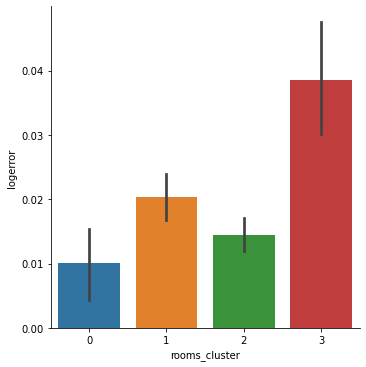

In [142]:
sns.catplot(x="rooms_cluster", y="logerror", kind="bar", data=X_train_explore)

#### Takeaways:
- Again, more variance between the groups. Possible to use these clusters in modeling.

In [152]:
# characterizing clusters:

X_train.groupby(['rooms_cluster'])['bedroomcnt', 'bathroomcnt'].agg(['mean', 'median', 'std', 'min', 'max'])

bedroomcnt                            bathroomcnt         \
                    mean median       std  min  max        mean median   
rooms_cluster                                                            
0               1.934778    2.0  0.246945  1.0  2.0    1.329980    1.0   
1               4.142493    4.0  0.418978  3.0  7.0    2.559478    2.5   
2               2.988193    3.0  0.174011  2.0  4.0    2.013566    2.0   
3               4.527068    5.0  0.858629  2.0  7.0    4.483759    4.0   

                                   
                    std  min  max  
rooms_cluster                      
0              0.465115  1.0  3.0  
1              0.509760  1.0  3.5  
2              0.582423  1.0  4.0  
3              0.724551  3.0  7.0

In [153]:
X_train.groupby(['location_cluster'])['latitude', 'longitude', 'age'].agg(['mean', 'median', 'std', 'min', 'max'])

latitude                                             \
                       mean     median       std        min        max   
location_cluster                                                         
0                 34.580725  34.606129  0.132822  34.067665  34.812397   
1                 33.895446  33.875930  0.129897  33.340851  34.202654   
2                 34.085899  34.104785  0.122207  33.662066  34.734767   
3                 34.240628  34.232429  0.097797  33.884437  34.507840   
4                 33.682169  33.652645  0.150033  33.392330  34.151841   

                   longitude                                                \
                        mean      median       std         min         max   
location_cluster                                                             
0                -118.159469 -118.154917  0.138652 -118.636202 -117.653901   
1                -118.019289 -117.999878  0.160793 -118.426091 -117.618374   
2                -118.322754 -118.334600  0.138588 -119.287310 -117.719115   
3                -118.783086 -118.732584  0.262645 -119.475265 -118.309524   
4                -117.778114 -117.759868  0.144043 -118.412928 -117.572338   

                        age                                 
                       mean median        std   min    max  
location_cluster                                            
0                 29.972509   28.0  16.479053   1.0   73.0  
1                 58.397548   60.0  10.775475  18.0  111.0  
2                 77.744366   75.0  14.752598  46.0  137.0  
3                 41.844283   45.0  16.913889   2.0  102.0  
4                 30.011547   30.0  13.268079   2.0   68.0

# Modeling

In [146]:

# Split clusters in to dummy varaibles for modeling

X_train_scaled = pd.get_dummies(X_train_scaled,
                           columns=['rooms_cluster','value_cluster','location_cluster', 'land_cluster'])
X_validate_scaled = pd.get_dummies(X_validate_scaled,
                           columns=['rooms_cluster','value_cluster','location_cluster', 'land_cluster'])
X_test_scaled = pd.get_dummies(X_test_scaled,
                           columns=['rooms_cluster','value_cluster','location_cluster', 'land_cluster'])


X_train_scaled.shape, X_validate_scaled.shape, X_test_scaled.shape

((28246, 52), (12106, 52), (10089, 52))

In [147]:
X_train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,...,centroid_bathroomcnt,rooms_cluster_0,rooms_cluster_1,rooms_cluster_2,rooms_cluster_3,value_cluster_0,value_cluster_1,value_cluster_2,value_cluster_3,value_cluster_4,location_cluster_0,location_cluster_1,location_cluster_2,location_cluster_3,location_cluster_4,land_cluster_0,land_cluster_1,land_cluster_2,land_cluster_3,land_cluster_4
15372,0.166667,0.333333,0.161333,0.000000,0.537461,0.860562,0.018427,0.020696,0.000000,0.595588,0.022352,0.003953,0.001324,0.005387,1.0,0.0,0.0,0.404412,0.286140,0.018427,...,0.168928,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
25551,0.000000,0.166667,0.154903,0.000000,0.377387,0.619421,0.018563,0.106616,0.000000,0.323529,0.020621,0.014124,0.013153,0.015976,1.0,0.0,0.0,0.676471,0.251318,0.018563,...,0.054997,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
35475,0.166667,0.333333,0.152272,0.000000,0.576005,0.456912,0.014764,0.022785,0.000000,0.544118,0.026621,0.018316,0.016962,0.020211,1.0,0.0,0.0,0.455882,0.246383,0.014764,...,0.168928,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
33783,0.250000,0.500000,0.339471,0.297297,0.316782,0.860932,0.013880,0.075715,0.571429,0.617647,0.046182,0.024103,0.020432,0.023354,0.0,1.0,0.0,0.382353,0.217144,0.013880,...,0.259913,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
5437,0.333333,0.666667,0.358176,0.000000,0.647492,0.512339,0.027282,0.022785,0.000000,0.632353,0.025738,0.004885,0.001845,0.006399,1.0,0.0,0.0,0.367647,0.279190,0.027282,...,0.259913,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [162]:
baseline_mean = np.mean(y_train.logerror)
baseline_median = np.median(y_train.logerror)
baseline_mean, baseline_median

(0.017510878909501218, 0.00663736379591)

Going with the mean of `logerror` as the baseline model.

(0.0, 8.0)

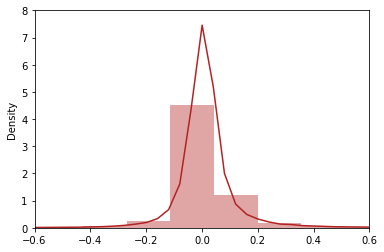

In [186]:
sns.distplot(y_train, color = 'firebrick')
plt.xlim(-.6, .6)
plt.ylim(0,8)

In [171]:
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select = 5)
rfe.fit(X_train_scaled, y_train)
ranks = rfe.ranking_
names = X_train_scaled.columns.tolist()
pd.DataFrame({'features': names, 'rank': ranks}).set_index('rank').sort_index()

,features
rank,
1,centroid_latitude
1,centroid_longitude
1,location_cluster_4
1,age
1,yearbuilt
2,location_cluster_1
3,location_cluster_2
4,location_cluster_0
5,Ventura


In [226]:
# encode as variable
# np.full modiefies shape turns value in to a full series object
baseline_rmse = mean_squared_error(y_train, np.full(y_train.shape[0], np.mean(y_train)))**(1/2)
print (f'The baseline_rmse is {baseline_rmse}')  # Model Error To Beat 0.16287423418470207

The baseline_rmse is 0.17284510813932977


In [225]:
y_train.shape

(28246, 1)

In [240]:
X_train_features = X_train_scaled[['centroid_latitude', 'centroid_longitude', 'age']]
X_validate_features = X_validate_scaled[['centroid_latitude', 'centroid_longitude', 'age']]
X_test_features = X_test_scaled[['centroid_latitude', 'centroid_longitude', 'age']]

Original features

## Train

#### Model 1 - Linear Regression

In [211]:
# Make Model
lm = LinearRegression()

# Fit Model
lm.fit(X_train_features, y_train)

# Make Predictions
lm_pred = lm.predict(X_train_features)

# Compute root mean squared error
lm_rmse = mean_squared_error(y_train, lm_pred)**(1/2)

lm_rmse

0.17275349555945635

#### Model 2 - Polynomial Regression

In [217]:
# Make the model
pf = PolynomialFeatures(degree=2)

# Fitting the model
X_train_squared = pf.fit_transform(X_train_features)
X_validate_squared = pf.transform(X_validate_features)
X_test_squared = pf.transform(X_test_features)

# predict:

lm_squared = LinearRegression()
lm_squared.fit(X_train_squared, y_train.logerror)

lm_sqrd_pred = lm_squared.predict(X_train_squared)

#RMSE:
lm_squared_RMSE = mean_squared_error(y_train, lm_sqrd_pred)**(1/2)
lm_squared_RMSE

0.1727088312379567

#### Model 3 - LassoLars

In [219]:
# Make a model
lars = LassoLars(alpha=1)
# Fit a model
lars.fit(X_train_features, y_train)
# Make Predictions
lars_pred = lars.predict(X_train_features)
# Computer root mean squared error
lars_rmse = mean_squared_error(y_train, lars_pred)**(1/2)
lars_rmse

0.17284510813932977

#### Model 4 - Tweedie Regression

In [220]:
tw = TweedieRegressor(power=0, alpha=0.1) # 0 = normal distribution
# Fit Model
tw.fit(X_train_features, y_train)
# Make Predictions
tw_pred = tw.predict(X_train_features)
# Compute root mean squared error
tw_rmse = mean_squared_error(y_train, tw_pred)**(1/2)
tw_rmse

0.17280366564515062

In [ ]:
tw = TweedieRegressor(power=0, alpha=0.1) # 0 = normal distribution
# Fit Model
tw.fit(X_train_features, y_train)
# Make Predictions
tw_pred = tw.predict(X_train_features)
# Compute root mean squared error
tw_rmse = mean_squared_error(y_train, tw_pred)**(1/2)
tw_rmse

#### Model 5 - RFE

In [254]:
## Assessing the RFE using a linear regression model
lm_basic = LinearRegression()

rfe_basic = RFE(lm, 4)

lm_X_rfe = rfe_basic.fit_transform(X_train_scaled, y_train) 

In [256]:
## Here we want to filter through and return only the best features
mask = rfe_basic.support_ 
rfe_features = X_train_scaled.columns[mask]
print(f'selected {len(rfe_features)} features:', ', '.join(rfe_features))

selected 4 features: yearbuilt, age, centroid_latitude, location_cluster_4


In [257]:
lm_basic.fit(lm_X_rfe, y_train)

LinearRegression()

In [258]:
print("Linear Model:", lm)

print("intercept: ", lm.intercept_)

print("features: ", rfe_features)

print("coefficients: ", lm.coef_)

Linear Model: LinearRegression()
intercept:  [0.03836553]
features:  Index(['yearbuilt', 'age', 'centroid_latitude', 'location_cluster_4'], dtype='object')
coefficients:  [[-0.02903587 -0.00041364 -0.01826111]]


In [259]:
## Here we're going to add a column that will make property value predictions using the linear model
y_train_predict = y_train.copy()

y_train_predict['yhat_lm'] = lm_basic.predict(lm_X_rfe)

y_train_predict.head()

,logerror,yhat_lm
15372,0.040576,0.017944
25551,-0.220377,0.011597
35475,-0.017587,0.012329
33783,-0.015516,0.018921
5437,-0.006203,0.013428


In [260]:
## Checking the mean squared error of the model
RMSE_lm = np.sqrt(mean_squared_error(y_train_predict.logerror, y_train_predict.yhat_lm))
RMSE_lm

r2_lm = lm_basic.score(lm_X_rfe, y_train_predict.logerror)

r2_lm

0.0010963917362085684

In [ ]:
output = "{} = {:.4} + {:.2} * {} + {:.3} * {}".format(
    y_train.columns[0],
    lm.intercept_[0],
    lm.coef_[0][0],
    rfe_features[0],
    lm.coef_[0][1],
    rfe_features[1],
)
output

In [231]:
results = baseline_rmse, lm_rmse, lm_squared_RMSE, lars_rmse, tw_rmse
result_names = ["baseline_rmse", "lm_rmse", "lm_squared_RMSE", "lars_rmse", "tw_rmse"]
result_names

['baseline_rmse', 'lm_rmse', 'lm_squared_RMSE', 'lars_rmse', 'tw_rmse']

In [237]:
# Ranking the results:

result_df = pd.DataFrame({'results': results, 'model': result_names}).set_index('model')
result_df['rank'] = result_df['results'].rank().round()
result_df.sort_values(by = ['rank'])

,results,rank
model,,
lm_squared_RMSE,0.172709,1.0
lm_rmse,0.172753,2.0
tw_rmse,0.172804,3.0
baseline_rmse,0.172845,4.0
lars_rmse,0.172845,4.0


## Validate

#### Linear Regression

In [241]:
# Predictions
lm_pred_v = lm.predict(X_validate_features)

# RMSE
lm_rmse_v = mean_squared_error(y_validate, lm_pred_v)**(1/2)
lm_rmse_v

0.178674517553482

In [242]:
X_validate_features.shape, y_validate.shape

((12106, 3), (12106, 1))

In [243]:
# Feed new features in to linear model. 
lm_squared = LinearRegression(normalize=True)
lm_squared.fit(X_train_features, y_train)
# Make predictions
lm_squared_pred_v = lm_squared.predict(X_validate_features)
# Compute root mean squared error
lm_squared_rmse_v = mean_squared_error(y_validate, lm_squared_pred_v)**(1/2)
lm_squared_rmse_v

0.178674517553482

In [245]:

# Make predictions
tw_pred_v = tw.predict(X_validate_features)
# Compute root mean squared error
tw_rmse_v = mean_squared_error(y_validate, tw_pred_v)**(1/2)
tw_rmse_v

0.17870450936020393

In [252]:
results_v = baseline_rmse, lm_rmse_v, lm_squared_rmse_v, tw_rmse_v
result_names_v = ["baseline_rmse", "lm_rmse", "polynomial_RMSE", "tw_rmse"]

result_df_v = pd.DataFrame({'results': results_v, 'model': result_names_v}).set_index('model')
result_df_v['rank'] = result_df_v['results'].rank().round()
result_df_v.sort_values(by = ['rank'])

,results,rank
model,,
baseline_rmse,0.172845,1.0
lm_rmse,0.178675,2.0
polynomial_RMSE,0.178675,2.0
tw_rmse,0.178705,4.0


In [253]:
# This means the models were overfit on the train dataset.

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='logerror'>

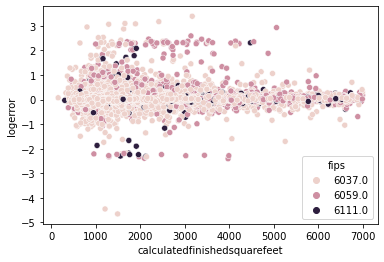

In [155]:
# For a simple visual answer, I'm going to use a scatterplot, with logerror being the value.

sns.scatterplot(x = 'calculatedfinishedsquarefeet', y = 'logerror', data = df, hue = 'fips')

<AxesSubplot:xlabel='latitude', ylabel='logerror'>

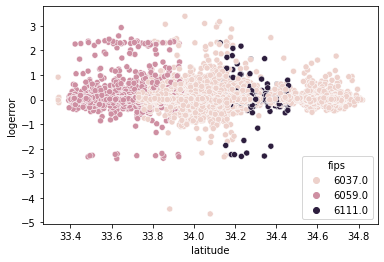

In [156]:
sns.scatterplot(x = 'latitude', y = 'logerror', data = df, hue = 'fips')

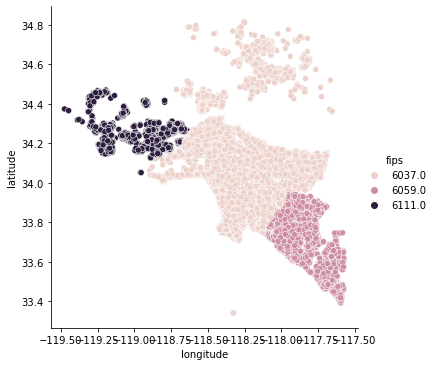

In [157]:
sns.relplot(x="longitude", y="latitude", hue="fips", data=df)

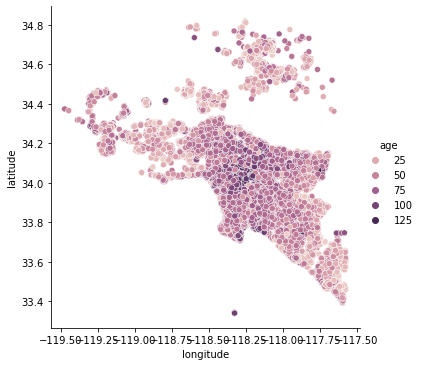

In [159]:
sns.relplot(x="longitude", y="latitude", hue="age", data=df)

In [ ]:
# Are there any features that I want to create from the existing data? Any I want to take away?
# First let's check the distributions of the existing cleaned columns:

In [ ]:
# separating by county
# Adding back a county column to the train df in order to viz the counties:
train_viz = train.copy()

# converting fips code to int. Will need to convert to string if I import into Tableau.
train_viz['fips'] = train_viz['fips'].astype('int')

conditions = [
    (train_viz['fips'] == 6037),
    (train_viz['fips'] == 6059),
    (train_viz['fips'] == 6111)
    ]

county_list = ['Los Angeles', 'Orange', 'Ventura']

train_viz['county'] = np.select(conditions, county_list)
train_viz.shape
sns.relplot(x="longitude", y="latitude", hue="county", data=train_viz)

## Can I visualize any significant relationship between logerror and any of my current features?

In [ ]:
# I'm not seeing any... And if I can't find any, not sure what to test or model on...

sns.catplot(x = 'fips', y = 'logerror', data = train)


In [39]:
from sklearn.feature_selection import SelectKBest, f_regression

In [143]:
# RFE:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## Assessing the RFE using a linear regression model
lm = LinearRegression()

rfe = RFE(lm, 5)

lm_X_rfe = rfe.fit_transform(X_train,y_train) 


## Here we want to filter through and return only the best features
mask = rfe.support_ 
rfe_features = X_train.columns[mask]
print(f'selected {len(rfe_features)} features:', ', '.join(rfe_features))

selected 5 features: yearbuilt, LA, Orange, Ventura, age


In [144]:
from sklearn.feature_selection import SelectKBest, f_regression

In [145]:
f_selector = SelectKBest(f_regression, k=5)

# we are running the scaled train data through kbest
f_selector = f_selector.fit(X_train_scaled, y_train.logerror)

X_train_reduced = f_selector.transform(X_train_scaled)
print(X_train.shape)
print(X_train_reduced.shape)

f_support = f_selector.get_support()

f_feature = X_train_scaled.iloc[:, f_support].columns.tolist()
f_feature

(28246, 37)
(28246, 5)


['bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'centroid_calculatedfinishedsquarefeet',
 'centroid_bathroomcnt']

In [ ]:
# According to KBest, it appears that 3 of the centroids created through clustering are among the 5 best features to use in modeling...

In [ ]:
X_train_scaled.info()

In [149]:
X_validate_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,...,centroid_age_y,rooms_cluster_0,rooms_cluster_1,rooms_cluster_2,rooms_cluster_3,value_cluster_0,value_cluster_1,value_cluster_2,value_cluster_3,value_cluster_4,location_cluster_0,location_cluster_1,location_cluster_2,location_cluster_3,location_cluster_4,land_cluster_0,land_cluster_1,land_cluster_2,land_cluster_3,land_cluster_4
52901,0.500000,0.500000,0.442496,1.000000,0.608602,0.361062,0.015909,0.060089,0.714286,0.882353,0.079858,0.031625,0.023631,0.031396,0.0,0.0,1.0,0.117647,0.223124,0.015909,...,0.300845,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
26478,0.166667,0.666667,0.274441,0.000000,0.488433,0.609990,0.015532,0.022785,0.000000,0.279412,0.045884,0.025328,0.021870,0.027677,1.0,0.0,0.0,0.720588,0.245083,0.015532,...,0.564721,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
36966,0.166667,0.333333,0.206927,0.297297,0.264628,0.969361,0.054100,0.032814,0.428571,0.764706,0.016440,0.002035,0.000084,0.001911,0.0,1.0,0.0,0.235294,0.188943,0.054100,...,0.213275,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
74471,0.250000,0.333333,0.316820,0.297297,0.260480,0.746009,0.003105,0.055276,0.571429,0.676471,0.046080,0.031094,0.028389,0.030862,0.0,1.0,0.0,0.323529,0.223039,0.003105,...,0.421808,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
64375,0.500000,0.500000,0.421599,0.000000,0.587743,0.443018,0.010506,0.022785,0.000000,0.801471,0.065119,0.018070,0.010573,0.019887,1.0,0.0,0.0,0.198529,0.245661,0.010506,...,0.300845,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [148]:
# RFE:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## Assessing the RFE using a linear regression model
lm = LinearRegression()

rfe = RFE(lm, 5)

lm_X_rfe = rfe.fit_transform(X_train,y_train) 


## Here we want to filter through and return only the best features
mask = rfe.support_ 
rfe_features = X_train.columns[mask]
print(f'selected {len(rfe_features)} features:', ', '.join(rfe_features))

selected 5 features: yearbuilt, LA, Orange, Ventura, age


# Following the curriculum

## Modeling

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled, y_train.logerror)
y_hat = lm.predict(X_train_scaled)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_train.logerror, y_hat)**(1/2)

In [ ]:
y_hat = np.full(y_hat.shape[0], np.mean(y_train.logerror))
y_hat

import math
math.sqrt(mean_squared_error(y_train.logerror, y_hat))
print("Baseline: ")

In [ ]:
y_hat.shape[0]

# Data I wish I had:
I wish I had more supply and demand type of data. The problem we are trying to solve is, what causes `logerror`? The biggest difference in the Zestimate being different than the actual selling price of the home is the forces of supply and demand. One house with 3 bedrooms and 2 baths in a nice school district might sell for \$550,000 (Remember this is California) in June, while a house almost identical might sell for 450,000 because it's not in the "right" school district. Or two nearly identical houses next to each other, selling 6 months apart could be wildly different just because of the demand fluctuations during those different periods.

Here is a list of added information I would want if I had more time:
- School District coverage and quality info.
- Data to determine driving/walking distance to ammenities/shopping/essential services (fire, police, etc).
- Distance from the beach (Could've added this, but ran out of time)
- Distance from major employers or employement centers in the cities covered.
- Grocery store locations and distance from home
- Noise level readings or categorization.
    - Related to how close a house is to a major freeway or roadway, airport, etc.
    - Would take work, but one could use lat/long data to map and compare to the FFA's flight approach information to all regional airports to see if a property fell within that airport approach vector. That information is in the public domain.
- Neighborhood/HOA info: parks, community pools, etc.

In [ ]:
- 